In [1]:
import qiskit
import numpy as np # define random numbers
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import Aer
from qiskit import transpile
from qiskit.visualization import circuit_drawer, plot_bloch_multivector, plot_histogram
from qiskit.visualization import array_to_latex
from qiskit.quantum_info import random_statevector
#from qiskit.extensions import initialize
from math import pi, sqrt
import pylatexenc
from pylatexenc.latex2text import LatexNodes2Text

In [7]:
n = 3
c = '110'

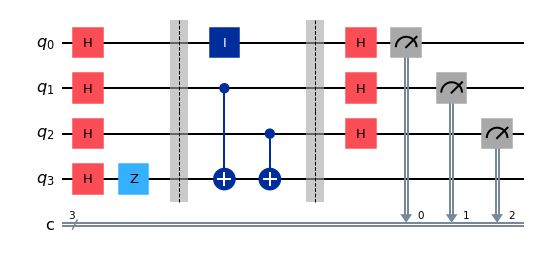

In [8]:
bv_circuit = QuantumCircuit(n+1, n) # n+1 for the input and n for the measurement of the n qubits

bv_circuit.h(n)
bv_circuit.z(n) #to get the |-> state or the other way first apply x|0> = |1> then apply h |1> =|-> state

for i in range(n):
    bv_circuit.h(i) # apply it to all qubits
    
bv_circuit.barrier()

#define the oracle function

c = c[::-1] # reverse operation: 011
for q in range(n):
    if c[q] == '0':
        bv_circuit.id(q) # identity gate
    else:
        bv_circuit.cx(q,n)
        
bv_circuit.barrier()

for i in range(n):
    bv_circuit.h(i)
    
for i in range(n):
    bv_circuit.measure (i,i)
    
bv_circuit.draw('mpl')

# QASM simulator


 Total counts are: {'110': 1000}


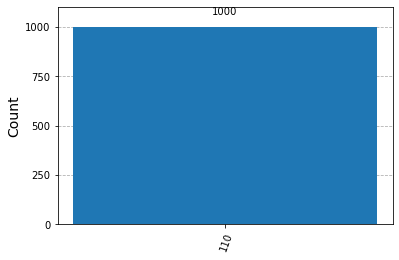

In [9]:
backend = Aer.get_backend('qasm_simulator')

dv_algo = transpile (bv_circuit, backend)

job = backend.run(dv_algo, shots = 1000)

result = job.result()

counts = result.get_counts(bv_circuit)

print("\n Total counts are:", counts)

plot_histogram(counts)